In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import monte_carlo as mc
import black_scholes as bs
import binomial_tree as bt
import payoff as po


For constant volatility and intrest rate, we have several ways of estimating the option price: using binimial trees, monte-carlo estimation or the closed-form Black-Scholes results. Let us check they all agree e.g. American/European call option on a non-dividend-yielding underlying with strike K=100, expiry T=1year, intrest 5% p.a., underlying volatiliy 20%/sqrt{year}

In [3]:
Srange = np.linspace(50,150,30)
K = 100
T = 1
r = 0.05
sigma = 0.2
payoff = lambda S:po.payoff_call(S,K)
price_mc_1e1 = []
price_mc_1e2 = []
price_mc_1e3 = []
price_bt_1step = []
price_bt_10step = []
price_bs = []
for S0 in Srange:
    price_mc_1e1.append(mc.MC_price(S0,r,sigma,T,T,payoff,10**1))
    price_mc_1e2.append(mc.MC_price(S0,r,sigma,T,T,payoff,10**2))
    price_mc_1e3.append(mc.MC_price(S0,r,sigma,T,T,payoff,10**3))
    price_bt_1step.append(bt.eval_option_tree(S0,K,r,sigma,1,1,'call','european'))
    price_bt_10step.append(bt.eval_option_tree(S0,K,r,sigma,1,10,'call','european'))
    price_bs.append(bs.bs_formula_price(S0, K, r, 0,sigma, T, 'call'))
price_mc_1e1 = np.array(price_mc_1e1)
price_mc_1e2 = np.array(price_mc_1e2)
price_mc_1e3 = np.array(price_mc_1e3)
price_bt_1step = np.array(price_bt_1step)
price_bt_10step = np.array(price_bt_10step)
price_bs = np.array(price_bs)

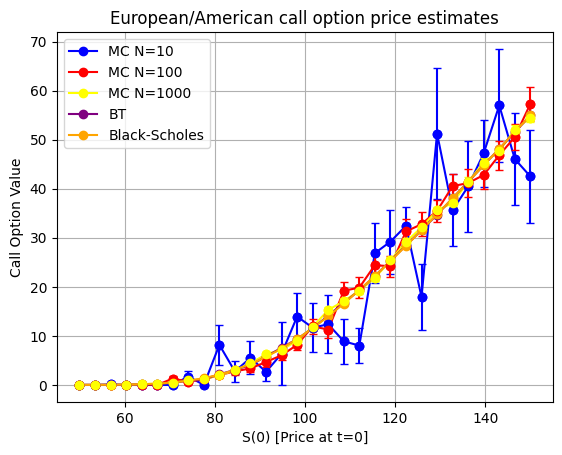

In [ ]:
plt.plot(Srange, price_mc_1e1[:,0], marker='o',color='blue',label='MC N=10')
plt.errorbar(Srange, price_mc_1e1[:,0], yerr=price_mc_1e1[:,1], fmt='o', color='blue', capsize=3)
plt.plot(Srange, price_mc_1e2[:,0], marker='o',color='red',label='MC N=100')
plt.errorbar(Srange, price_mc_1e2[:,0], yerr=price_mc_1e2[:,1], fmt='o', color='red', capsize=3)
plt.plot(Srange, price_mc_1e3[:,0], marker='o',color='yellow',label='MC N=1000')
plt.errorbar(Srange, price_mc_1e3[:,0], yerr=price_mc_1e3[:,1], fmt='o', color='yellow', capsize=3)
# plt.plot(Srange, price_bt_1step, marker='o',color='green',label='BT 1 step')
plt.plot(Srange, price_bt_10step, marker='o',color='purple',label='BT')
plt.plot(Srange, price_bs, marker='o',color='orange',label='Black-Scholes')
plt.xlabel("S(0) [Price at t=0]")
plt.ylabel("Call Option Value")
plt.title("European/American call option price as a function of S(0)")
plt.legend()
plt.grid(True)

Clearly a nice agreement with all the methods, with the MC method converging on the right result with enough statistics. We can also plot the dependence of the price on the strike price K for a fixed present value S0=100.

In [5]:
Krange = np.linspace(50,150,30)
S0 = 100
T = 1
r = 0.05
sigma = 0.2
payoff = lambda S:po.payoff_call(S,K)
price_mc_1e1 = []
price_mc_1e2 = []
price_mc_1e3 = []
price_bt_1step = []
price_bt_10step = []
price_bs = []
for K in Krange:
    price_mc_1e1.append(mc.MC_price(S0,r,sigma,T,T,payoff,10**1))
    price_mc_1e2.append(mc.MC_price(S0,r,sigma,T,T,payoff,10**2))
    price_mc_1e3.append(mc.MC_price(S0,r,sigma,T,T,payoff,10**3))
    price_bt_1step.append(bt.eval_option_tree(S0,K,r,sigma,1,1,'call','european'))
    price_bt_10step.append(bt.eval_option_tree(S0,K,r,sigma,1,10,'call','european'))
    price_bs.append(bs.bs_formula_price(S0, K, r, 0,sigma, T, 'call'))
price_mc_1e1 = np.array(price_mc_1e1)
price_mc_1e2 = np.array(price_mc_1e2)
price_mc_1e3 = np.array(price_mc_1e3)
price_bt_1step = np.array(price_bt_1step)
price_bt_10step = np.array(price_bt_10step)
price_bs = np.array(price_bs)

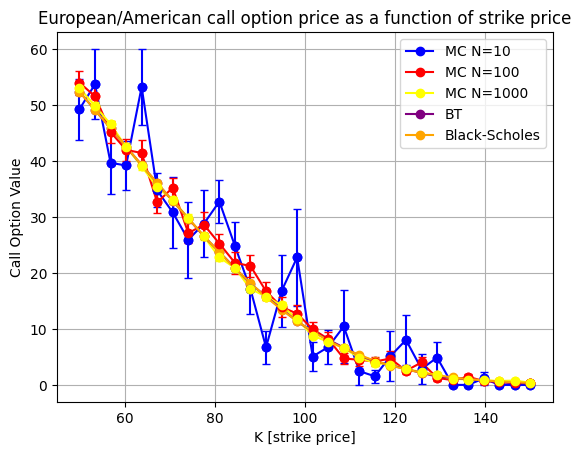

In [7]:
plt.plot(Krange, price_mc_1e1[:,0], marker='o',color='blue',label='MC N=10')
plt.errorbar(Krange, price_mc_1e1[:,0], yerr=price_mc_1e1[:,1], fmt='o', color='blue', capsize=3)
plt.plot(Krange, price_mc_1e2[:,0], marker='o',color='red',label='MC N=100')
plt.errorbar(Krange, price_mc_1e2[:,0], yerr=price_mc_1e2[:,1], fmt='o', color='red', capsize=3)
plt.plot(Krange, price_mc_1e3[:,0], marker='o',color='yellow',label='MC N=1000')
plt.errorbar(Krange, price_mc_1e3[:,0], yerr=price_mc_1e3[:,1], fmt='o', color='yellow', capsize=3)
# plt.plot(Krange, price_bt_1step, marker='o',color='green',label='BT 1 step')
plt.plot(Krange, price_bt_10step, marker='o',color='purple',label='BT')
plt.plot(Krange, price_bs, marker='o',color='orange',label='Black-Scholes')
plt.xlabel("K [strike price]")
plt.ylabel("Call Option Value")
plt.title("European/American call option price as a function of strike price")
plt.legend()
plt.grid(True)

Good agreement again, and the expected behaviour - moving further in (out) of the money by decreasing (increasing) K leads to a price increase (decrease).

Now let move to puts - where things are more interesting since even for non-divident-yielding underlying, European and American puts behave differently. 

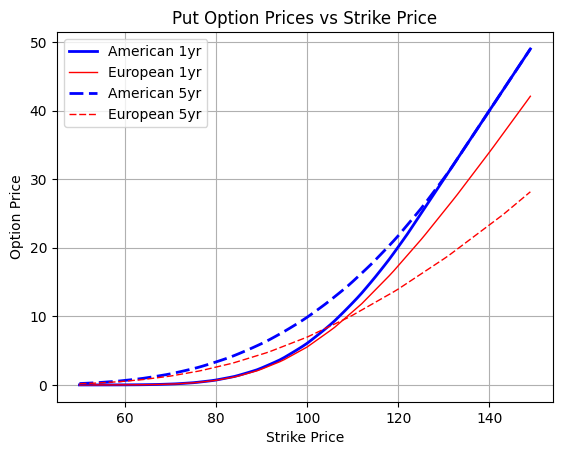

In [25]:
strikes = [x[0] for x in american_call_prices]
american_values = [x[1] for x in american_put_prices]
european_values = [x[1] for x in european_put_prices]
american_values2 = [x[1] for x in american_put_prices_2yrs]
european_values2 = [x[1] for x in european_put_prices_2yrs]

plt.plot(strikes, american_values, label="American 1yr", linewidth=2,color='blue')
plt.plot(strikes, european_values, label="European 1yr", linewidth=1,color='red')
plt.plot(strikes, american_values2, label="American 5yr", linewidth=2,dashes=(5,2),color='blue')
plt.plot(strikes, european_values2, label="European 5yr", linewidth=1,dashes=(5,2),color='red')
plt.xlabel("Strike Price")
plt.ylabel("Option Price")
plt.title("Put Option Prices vs Strike Price")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
american_put_prices = []
european_put_prices = []
american_put_prices_2yrs = []
european_put_prices_2yrs = []
for i in np.arange(0.05, 0.4, 0.01):
    american_put_prices.append([i,op.eval_option_tree(100,110,0.05,i,1,50,"put","american")])
    european_put_prices.append([i,op.eval_option_tree(100,110,0.05,i,1,50,"put","european")])
    american_put_prices_2yrs.append([i,op.eval_option_tree(100,110,0.05,i,5,100,"put","american")])
    european_put_prices_2yrs.append([i,op.eval_option_tree(100,110,0.05,i,5,100,"put","european")])

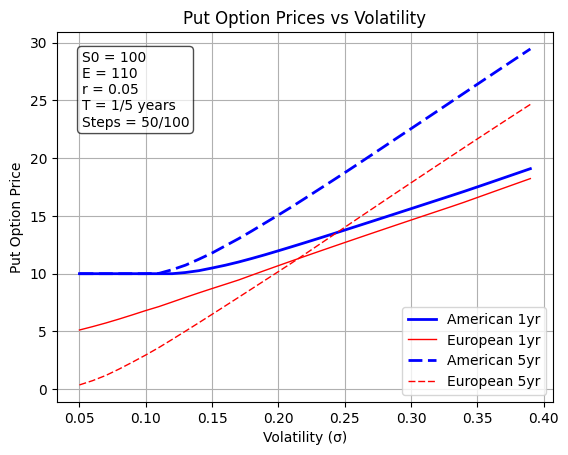

In [31]:
vols = [x[0] for x in american_put_prices]
american_values = [x[1] for x in american_put_prices]
european_values = [x[1] for x in european_put_prices]
american_values2 = [x[1] for x in american_put_prices_2yrs]
european_values2 = [x[1] for x in european_put_prices_2yrs]

plt.plot(vols, american_values, label="American 1yr", linewidth=2, color='blue')
plt.plot(vols, european_values, label="European 1yr", linewidth=1, color='red')
plt.plot(vols, american_values2, label="American 5yr", linewidth=2, dashes=(5,2), color='blue')
plt.plot(vols, european_values2, label="European 5yr", linewidth=1, dashes=(5,2), color='red')
plt.xlabel("Volatility (σ)")
plt.ylabel("Put Option Price")
plt.title("Put Option Prices vs Volatility")
plt.legend()
plt.grid(True)

params_text = (
    "S0 = 100\n"
    "E = 110\n"
    "r = 0.05\n"
    "T = 1/5 years\n"
    "Steps = 50/100"
)
plt.gca().text(
    0.05, 0.95, params_text,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

plt.show()